# Surface Boundary Conditions on the Sub-Giant Branch

In particular, exploring how surface boundary conditions can affect the morphology of the sub-giant branch in relation to the "retired A-star" debate in the literature.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Link to directory where model tracks exist.

In [31]:
dsep15_directory = '/Users/grefe950/evolve/dmestar/trk'
dsep08_directory = '/Users/grefe950/evolve/dsep08/trk/fehp00afep0/'
parsec_directory = '/Users/grefe950/evolve/padova/trk/2008/z017y26'

Routine to load and trim model mass track.

In [11]:
def loadTrack(filename):
    trk = np.genfromtxt(filename, usecols=(0,1,2,3,4,5))
    bools = [x[0] > 1.0e8 for x in trk]
    return np.compress(bools, trk, axis=0)

Load models with several different boundary condition prescriptions,

In [60]:
trk_atlas  = loadTrack('{0}/tmp/atlas/gs98/m2500_GS98_p000_p0_y28_mlt1.884.trk'.format(dsep15_directory))
trk_marcs  = loadTrack('{0}/gas07/p000/a0/amlt2202/m2500_GAS07_p000_p0_y26_mlt2.202.trk'.format(dsep15_directory))
trk_dsep   = loadTrack('{0}/m250fehp00afep0.jc2mass'.format(dsep08_directory))
trk_parsec = np.genfromtxt('{0}/ms_2.50.dat'.format(parsec_directory), usecols=(0,1,2,3,4,5))

Plot mass track.

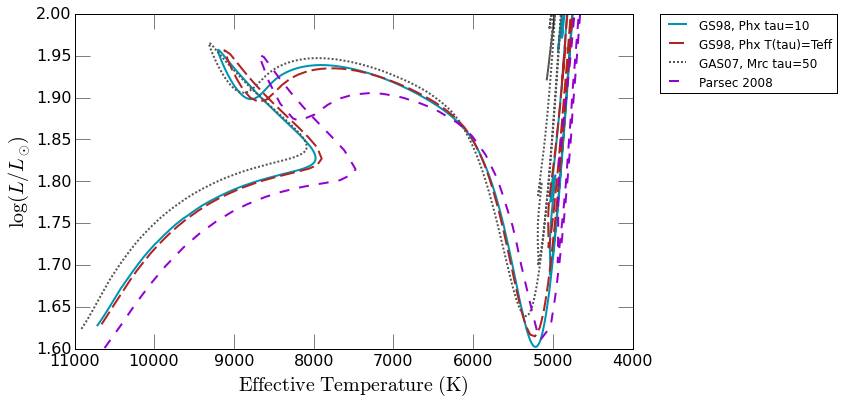

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(10., 6.))

ax.set_xlim(1.1e4, 4.0e3)
ax.set_ylim(1.6, 2.0)
ax.set_xlabel('${\\rm Effective\ Temperature\ (K)}$', fontsize=20., family='serif')
ax.set_ylabel('$\\log (L / L_{\\odot})$', fontsize=20., family='serif')
ax.tick_params(which='major', axis='both', length=15., labelsize=16.)

ax.plot(10**trk_atlas[:,1], trk_atlas[:,3], lw=2, c='#0094b2', label='GS98, Phx tau=10')
ax.plot(10**trk_dsep[:,1], trk_dsep[:,3], lw=2, dashes=(15., 5.), c='#B22222', label='GS98, Phx T(tau)=Teff')
ax.plot(10**trk_marcs[:,1], trk_marcs[:,3], lw=2, dashes=(2.0, 2.0), c='#555555', label='GAS07, Mrc tau=50')
ax.plot(10**trk_parsec[:,3], trk_parsec[:,2], lw=2, dashes=(10., 10.), c='#9400D2', label='Parsec 2008')

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Adjust temperature and luminosity to better reveal morphological difference along the sub-giant branch.

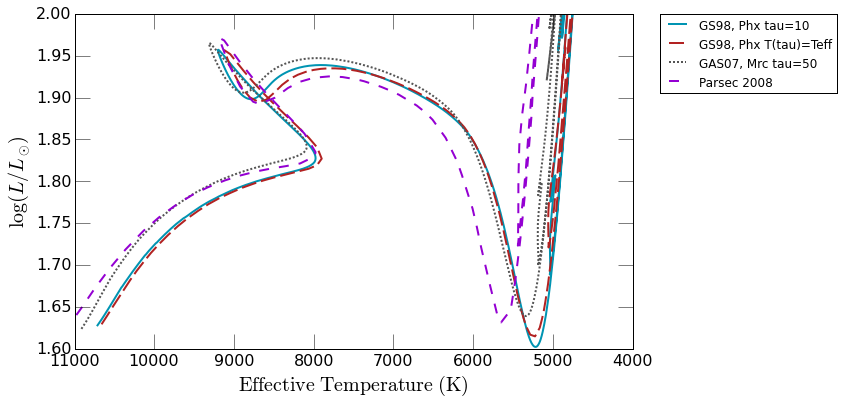

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(10., 6.))

ax.set_xlim(1.1e4, 4.0e3)
ax.set_ylim(1.6, 2.0)
ax.set_xlabel('${\\rm Effective\ Temperature\ (K)}$', fontsize=20., family='serif')
ax.set_ylabel('$\\log (L / L_{\\odot})$', fontsize=20., family='serif')
ax.tick_params(which='major', axis='both', length=15., labelsize=16.)

ax.plot(10**trk_atlas[:,1], trk_atlas[:,3], lw=2, c='#0094b2', label='GS98, Phx tau=10')
ax.plot(10**trk_dsep[:,1], trk_dsep[:,3], lw=2, dashes=(15., 5.), c='#B22222', label='GS98, Phx T(tau)=Teff')
ax.plot(10**trk_marcs[:,1], trk_marcs[:,3], lw=2, dashes=(2.0, 2.0), c='#555555', label='GAS07, Mrc tau=50')
ax.plot(10**trk_parsec[:,3] + 500., trk_parsec[:,2] + 0.02, lw=2, dashes=(10., 10.), c='#9400D2', label='Parsec 2008')

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

All three Dartmouth models exhibit similar morphological trends along the sub-giant branch with subtle differences owing to small differences in adopted chemical compositions, convective mixing lengths, and locations where surface boundary conditions are attached. The Padova model, on the other hand, shows distinct morphological differences compared to the Dartmouth tracks and exhibits an overall cooler effective throughout its evolution by approximately 500 K. I shifted the Parsec track so to match the Dartmouth models near the MSTO around 7800 K by adding 500 K to the effective temperature and 0.02 dex to the logarithm of the bolometric luminosity. 

The Padova model shows a morphology that is somewhat mixed between the Dartmouth models with GS98 and GAS07 solar compositions. In general, this does not appear to be a signifiacnt source of discrepancy between the models, with the MS morphology being similar up toward the end of the blue loop. However, the Padova model enters the sub-giant branch with a shallower slope. This leads to the Padova model showing a larger relative difference between temperatures at the turn-off and bRGB. The luminosity at the bRGB is comparable to our track with the GAS07 solar abundance, whereas the GS98 models (with higher overall Z) extend to lower luminosities. The extend of the sub-giant branch in effective temperature among the Padova models suggests that the internal structure of these particular models are distinct from those of the Dartmouth models. 

These types of structural differences along the sub-giant branch could lead to a variety of asteroseismic signatures among the models. Whether a higher mass Padova model would yield a similar sub-giant branch extend is hard to gauge with their course grid resolution (see below). We can also ask how radii (here, log(g)s) differ between the models as a function of age to probe how the asteroseismic mean density will be affected by potential structural differences in the evolution models.

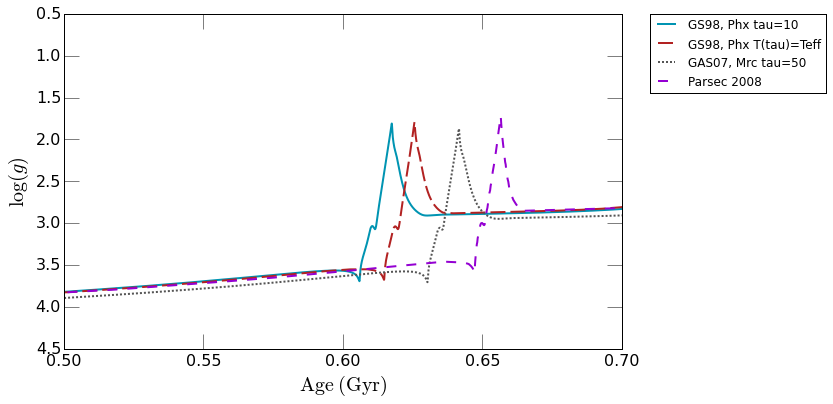

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(10., 6.))

ax.set_xlim(0.5, 0.7)
ax.set_ylim(4.5, 0.5)
ax.set_xlabel('${\\rm Age\\ (Gyr)}$', fontsize=20.)
ax.set_ylabel('$\\log (g)$', fontsize=20.)
ax.tick_params(which='major', axis='both', length=15., labelsize=16.)

ax.plot(trk_atlas[:,0]/1.0e9, trk_atlas[:,2], lw=2, c='#0094b2', label='GS98, Phx tau=10')
ax.plot(trk_dsep[:,0]/1.0e9, trk_dsep[:,2], lw=2, dashes=(15., 5.), c='#B22222', label='GS98, Phx T(tau)=Teff')
ax.plot(trk_marcs[:,0]/1.0e9, trk_marcs[:,2], lw=2, dashes=(2.0, 2.0), c='#555555', label='GAS07, Mrc tau=50')
ax.plot(trk_parsec[:,1]/1.0e9, trk_parsec[:,4], lw=2, dashes=(10., 10.), c='#9400D2', label='Parsec 2008')

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)